# Mars Retrograde Motion Simulation

## Plot

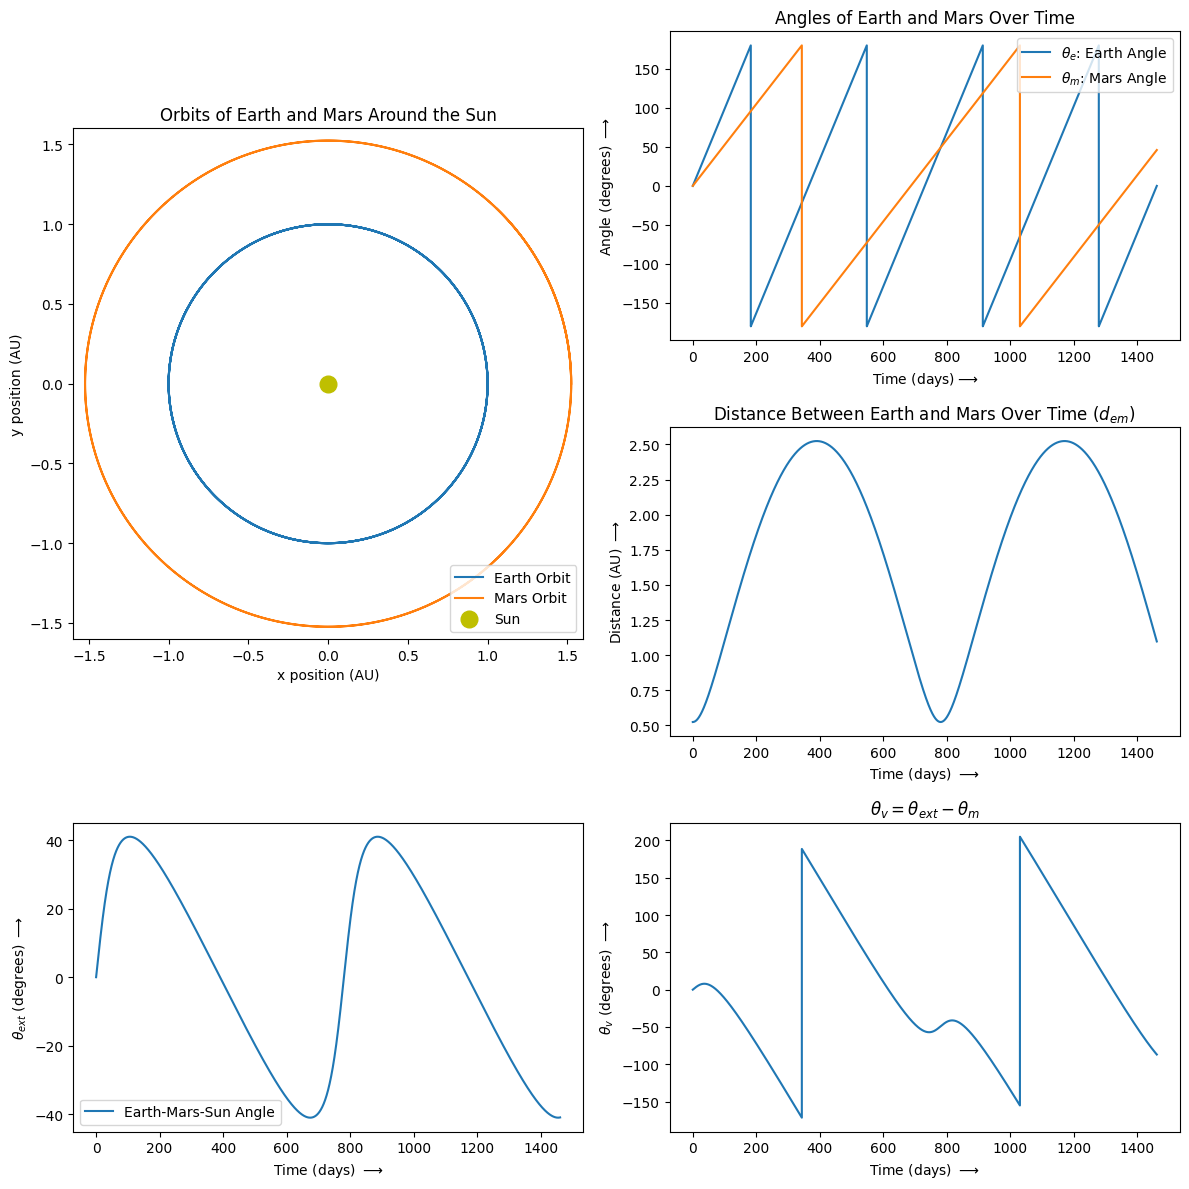

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Constants 
AU = 1.496e11  # astronomical unit (meters)
year_in_seconds = 365.25 * 24 * 3600  # one year in seconds
T_earth = year_in_seconds  # Earth's orbital period (1 year)
T_mars = 1.88 * year_in_seconds  # Mars' orbital period (1.88 years)

# Angular velocities and orbital radii 
omega_earth = 2 * np.pi / T_earth  # rad/s for Earth
omega_mars = 2 * np.pi / T_mars  # rad/s for Mars
r_earth = 1  # Earth orbit radius in AU
r_mars = 1.524   # Mars orbit radius in AU

# Time parameters 
dt = 60 * 60  # time step in seconds (1 hour)
time_span = 4 * year_in_seconds  # simulate for 4 years (You can change this value)

# Lists to store position, angle, and distance data
positions_earth_x = []
positions_earth_y = []
positions_mars_x = []
positions_mars_y = []
angles_earth = []
angles_mars = []
distances_earth_mars = []
angles_earth_mars_sun = []
theta_v_list = []

# Simulation loop
for t in np.arange(0, time_span, dt):
    # Update Earth's position using its angular velocity
    x_earth = r_earth * np.cos(omega_earth * t)  # cos(omega * t) starts at angle 0
    y_earth = r_earth * np.sin(omega_earth * t)  # sin(omega * t) starts at angle 0
    positions_earth_x.append(x_earth)
    positions_earth_y.append(y_earth)
    
    # Earth's angle with respect to the x-axis
    angle_earth = np.arctan2(y_earth, x_earth)
    angles_earth.append(np.degrees(angle_earth))
    
    # Update Mars' position using its angular velocity
    x_mars = r_mars * np.cos(omega_mars * t)  # cos(omega * t) starts at angle 0
    y_mars = r_mars * np.sin(omega_mars * t)  # sin(omega * t) starts at angle 0
    positions_mars_x.append(x_mars)
    positions_mars_y.append(y_mars)
    
    # Mars' angle with respect to the x-axis
    angle_mars = np.arctan2(y_mars, x_mars)
    angles_mars.append(np.degrees(angle_mars))
    
    # Calculate the distance between Earth and Mars
    distance_earth_mars = np.linalg.norm([x_mars - x_earth, y_mars - y_earth])
    distances_earth_mars.append(distance_earth_mars)
    
    # Calculate the angle between the Earth-Mars line and Mars-Sun line
    # vector_earth_mars = np.array([x_earth - x_mars, y_earth - y_mars])
    # vector_mars_sun = np.array([-x_mars, -y_mars])
    # dot_product = np.dot(vector_earth_mars, vector_mars_sun)
    # norm_earth_mars = np.linalg.norm(vector_earth_mars)
    # norm_mars_sun = np.linalg.norm(vector_mars_sun)
    # angle_earth_mars_sun = np.arccos(dot_product / (norm_earth_mars * norm_mars_sun))
    angle_earth_mars_sun = np.arcsin((r_earth*np.sin(angle_earth - angle_mars)/(np.sqrt(r_earth*r_earth + r_mars*r_mars - 2*r_earth*r_mars*np.cos(angle_earth - angle_mars)))))
    angles_earth_mars_sun.append(np.degrees(angle_earth_mars_sun))
    
    # Calculate theta_v: the difference between angles_earth_mars_sun and the angle of Mars
    theta_v = np.degrees(angle_earth_mars_sun) - np.degrees(angle_mars)
    theta_v_list.append(theta_v)


# Time in days for plotting
time_in_days = np.arange(0, time_span, dt) / (24 * 3600)

# Create a figure with a 3x2 grid layout using GridSpec
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 2, figure=fig)

# Plot 1: Orbit of Earth and Mars (occupies the first two rows of the first column)
ax1 = fig.add_subplot(gs[0:2, 0])
ax1.plot(positions_earth_x, positions_earth_y, label='Earth Orbit')
ax1.plot(positions_mars_x, positions_mars_y, label='Mars Orbit')
ax1.plot(0, 0, 'yo', label='Sun', markersize=12)
ax1.set_xlabel('x position (AU)')
ax1.set_ylabel('y position (AU)')
ax1.set_title('Orbits of Earth and Mars Around the Sun')
ax1.legend(loc='lower right', fontsize=10)
# ax1.grid(True)
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.6, 1.6)
ax1.set_aspect('equal', adjustable='box')

# Plot 2: Angles of Earth and Mars with respect to the x-axis over time
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(time_in_days, angles_earth, label=r'$\theta_e$: Earth Angle')
ax2.plot(time_in_days, angles_mars, label=r'$\theta_m$: Mars Angle')
ax2.set_xlabel(r'Time (days)$\longrightarrow$')
ax2.set_ylabel(r'Angle (degrees) $\longrightarrow$')
ax2.set_title('Angles of Earth and Mars Over Time')
ax2.legend()
# ax2.grid(True)

# Plot 3: Distance between Earth and Mars over time
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(time_in_days, distances_earth_mars, label='Distance between Earth and Mars')
ax3.set_xlabel(r'Time (days) $\longrightarrow$')
ax3.set_ylabel(r'Distance (AU) $\longrightarrow$')
ax3.set_title(r'Distance Between Earth and Mars Over Time $(d_{em})$')
# ax3.legend()
# ax3.grid(True)

# Plot 4: Angle between Earth-Mars and Mars-Sun over time
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(time_in_days, angles_earth_mars_sun, label='Earth-Mars-Sun Angle')
ax4.set_xlabel(r'Time (days) $\longrightarrow$')
ax4.set_ylabel(r'$\theta_{ext}$ (degrees) $\longrightarrow$')
# ax4.set_title(r'$\theta_{ext}$: Earth-Mars-Sun Angle Over Time')
ax4.legend()
# ax4.grid(True)

# Plot 5: Theta_v over time (Difference between angles_earth_mars_sun and Mars angle)
ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(time_in_days, theta_v_list, label=r'$\theta_v = \theta_{ext} - \theta_m$')
ax5.set_xlabel(r'Time (days) $\longrightarrow$')
ax5.set_ylabel(r'$\theta_v$ (degrees) $\longrightarrow$')
ax5.set_title(r'$\theta_v = \theta_{ext} - \theta_m$')
# ax5.legend(loc = 'upper left')
# ax5.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Animation Video

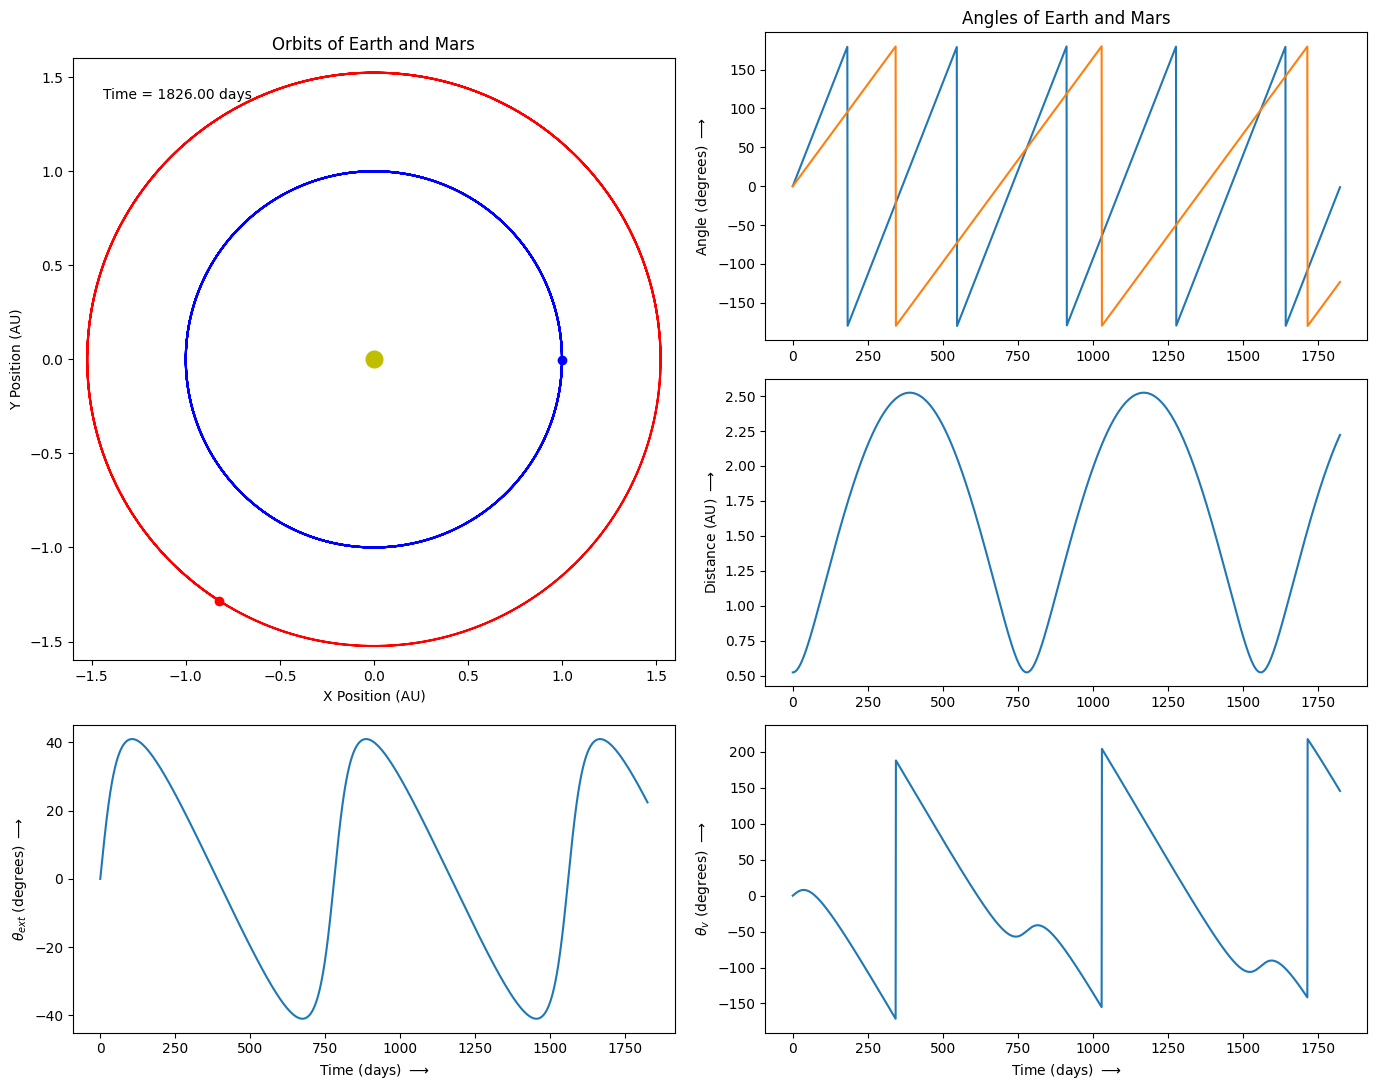

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.gridspec import GridSpec
import time

# Used for file nameing
timestr = time.strftime("%Y%m%d-%H%M%S")

# Constants
AU = 1.496e11  # astronomical unit (meters)
year_in_seconds = 365.25 * 24 * 3600  # one year in seconds
T_earth = year_in_seconds  # Earth's orbital period (1 year)
T_mars = 1.88 * year_in_seconds  # Mars' orbital period (1.88 years)

# Angular velocities and orbital radii (in AU)
omega_earth = 2 * np.pi / T_earth  # rad/s for Earth
omega_mars = 2 * np.pi / T_mars  # rad/s for Mars
r_earth = 1  # Earth orbit radius in AU (1 AU)
r_mars = 1.524  # Mars orbit radius in AU

# Time parameters
dt = 24*60 * 60  # time step in seconds (1 hour)
time_span = 5 * year_in_seconds  # simulate for 2 years
time_steps = np.arange(0, time_span, dt)
time_in_days = time_steps / (24 * 3600)

# Data lists
positions_earth_x = []
positions_earth_y = []
positions_mars_x = []
positions_mars_y = []
angles_earth = []
angles_mars = []
distances_earth_mars = []
angles_earth_mars_sun = []
theta_v_list = []

# Simulation loop
for t in time_steps:
    # Update Earth's position using its angular velocity (in AU)
    x_earth = r_earth * np.cos(omega_earth * t)
    y_earth = r_earth * np.sin(omega_earth * t)
    positions_earth_x.append(x_earth)
    positions_earth_y.append(y_earth)
    
    angle_earth = np.arctan2(y_earth, x_earth)
    angles_earth.append(np.degrees(angle_earth))
    
    # Update Mars' position using its angular velocity (in AU)
    x_mars = r_mars * np.cos(omega_mars * t)
    y_mars = r_mars * np.sin(omega_mars * t)
    positions_mars_x.append(x_mars)
    positions_mars_y.append(y_mars)
    
    angle_mars = np.arctan2(y_mars, x_mars)
    angles_mars.append(np.degrees(angle_mars))
    
    # Calculate the distance between Earth and Mars (in AU)
    distance_earth_mars = np.linalg.norm([x_mars - x_earth, y_mars - y_earth])
    distances_earth_mars.append(distance_earth_mars)
    
    # Angle between Earth-Mars and Mars-Sun
    # vector_earth_mars = np.array([x_earth - x_mars, y_earth - y_mars])
    # vector_mars_sun = np.array([-x_mars, -y_mars])
    # dot_product = np.dot(vector_earth_mars, vector_mars_sun)
    # norm_earth_mars = np.linalg.norm(vector_earth_mars)
    # norm_mars_sun = np.linalg.norm(vector_mars_sun)
    # angle_earth_mars_sun = np.arccos(dot_product / (norm_earth_mars * norm_mars_sun))

    # Calculating theta_ext: Angle between line joining Earth-Mars and Mars-Sun at the Mars
    angle_earth_mars_sun = np.arcsin((r_earth*np.sin(angle_earth - angle_mars)/(np.sqrt(r_earth*r_earth + r_mars*r_mars - 2*r_earth*r_mars*np.cos(angle_earth - angle_mars)))))
    angles_earth_mars_sun.append(np.degrees(angle_earth_mars_sun))
    
    # Calculate theta_v
    theta_v = np.degrees(angle_earth_mars_sun) - np.degrees(angle_mars)
    theta_v_list.append(theta_v)

# Create a figure with a 3x2 grid layout using GridSpec
fig = plt.figure(figsize=(14,11))
gs = GridSpec(3, 2, figure=fig)

# Create subplots
ax1 = fig.add_subplot(gs[0:2, 0])  # Orbits of Earth and Mars
ax2 = fig.add_subplot(gs[0, 1])    # Angles of Earth and Mars
ax3 = fig.add_subplot(gs[1, 1])    # Distance between Earth and Mars
ax4 = fig.add_subplot(gs[2, 0])    # Angle Earth-Mars-Sun
ax5 = fig.add_subplot(gs[2, 1])    # Theta_v

# Initial plot settings
ax1.plot(0, 0, 'yo', label='Sun', markersize=12)
ax1.set_xlabel('x position (AU)')
ax1.set_ylabel('y position (AU)')
ax1.set_title('Orbits of Earth and Mars Around the Sun (AU)')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.6, 1.6)
ax1.set_aspect('equal', adjustable='box')

# Adding axis labels to each plot
ax1.set_xlabel('X Position (AU)')
ax1.set_ylabel('Y Position (AU)')
ax1.set_title('Orbits of Earth and Mars')

# ax2.set_xlabel(r'Time (days) $\longrightarrow$')
ax2.set_ylabel(r'Angle (degrees) $\longrightarrow$')
ax2.set_title('Angles of Earth and Mars')

# ax3.set_xlabel(r'Time (days)  $\longrightarrow$')
ax3.set_ylabel(r'Distance (AU) $\longrightarrow$')

ax4.set_xlabel(r'Time (days) $\longrightarrow$')
ax4.set_ylabel(r'$\theta_{ext}$ (degrees) $\longrightarrow$')
# ax4.set_title(r'$\theta_{ext}$')

ax5.set_xlabel(r'Time (days) $\longrightarrow$')
ax5.set_ylabel(r'$\theta_v$ (degrees) $\longrightarrow$')


# Initialize the plots
earth_orbit, = ax1.plot([], [], 'b', label='Earth Orbit')
mars_orbit, = ax1.plot([], [], 'r', label='Mars Orbit')
earth_point, = ax1.plot([], [], 'bo')
mars_point, = ax1.plot([], [], 'ro')

# Initialize the time label for the first plot (planetary motion)
time_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, fontsize=10, color='black', verticalalignment='top')


angle_plot, = ax2.plot([], [], label='Earth Angle')
mars_angle_plot, = ax2.plot([], [], label='Mars Angle')

distance_plot, = ax3.plot([], [], label='Distance Earth-Mars (AU)')

angle_earth_mars_sun_plot, = ax4.plot([], [], label='Earth-Mars-Sun Angle')

theta_v_plot, = ax5.plot([], [], label=r'$\theta_v$')


def update(frame):
    # Update the orbits
    earth_orbit.set_data(positions_earth_x[:frame], positions_earth_y[:frame])
    mars_orbit.set_data(positions_mars_x[:frame], positions_mars_y[:frame])
    
    # Update the points (wrap in lists to avoid the warning)
    earth_point.set_data([positions_earth_x[frame]], [positions_earth_y[frame]])
    mars_point.set_data([positions_mars_x[frame]], [positions_mars_y[frame]])

    # Update the time text dynamically
    current_time = time_in_days[frame]  # Get the current time in days
    time_text.set_text(f'Time = {current_time:.2f} days')

    # Update the remaining plots as usual
    angle_plot.set_data(time_in_days[:frame], angles_earth[:frame])
    mars_angle_plot.set_data(time_in_days[:frame], angles_mars[:frame])
    ax2.relim()
    ax2.autoscale_view()

    distance_plot.set_data(time_in_days[:frame], distances_earth_mars[:frame])
    ax3.relim()
    ax3.autoscale_view()

    angle_earth_mars_sun_plot.set_data(time_in_days[:frame], angles_earth_mars_sun[:frame])
    ax4.relim()
    ax4.autoscale_view()

    theta_v_plot.set_data(time_in_days[:frame], theta_v_list[:frame])
    ax5.relim()
    ax5.autoscale_view()

    return (earth_orbit, mars_orbit, earth_point, mars_point, 
            angle_plot, mars_angle_plot, distance_plot, 
            angle_earth_mars_sun_plot, theta_v_plot, time_text)



# Animate
ani = FuncAnimation(fig, update, frames=len(time_steps), interval=50, blit=True)
fig.tight_layout()

# Show the animation
# plt.tight_layout()
# plt.show()

# To save the animation as an mp4 video:
ani.save(f'planet_motion{timestr}.mp4', writer='ffmpeg', fps=30, dpi=120)
